In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load dataset
file_path = r"C:\Users\DELL\Downloads\Housing.csv"
df = pd.read_csv(file_path)

# Clean column names (optional but recommended)
df.columns = df.columns.str.strip()

# Preview data
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [3]:
# Define features and target variable
X = df[['area', 'bedrooms', 'bathrooms']]
y = df['price']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R² Score: {r2:.2f}")


📊 Model Evaluation:
Mean Absolute Error (MAE): 1,265,275.67
Mean Squared Error (MSE): 2,750,040,479,309.05
Root Mean Squared Error (RMSE): 1,658,324.60
R² Score: 0.46


In [7]:
# Model coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\n📈 Feature Coefficients:")
print(coeff_df)

# Intercept
print("\nIntercept:", model.intercept_)



📈 Feature Coefficients:
            Coefficient
area       3.454666e+02
bedrooms   3.601977e+05
bathrooms  1.422320e+06

Intercept: 59485.379208717495


In [8]:
# Example: Predict price for a house with 3000 sqft, 3 bedrooms, 2 bathrooms
new_data = pd.DataFrame({'area': [3000], 'bedrooms': [3], 'bathrooms': [2]})
predicted_price = model.predict(new_data)

print(f"\n💡 Predicted Price for input {new_data.to_dict('records')[0]}: ₹{predicted_price[0]:,.2f}")



💡 Predicted Price for input {'area': 3000, 'bedrooms': 3, 'bathrooms': 2}: ₹5,021,117.36


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


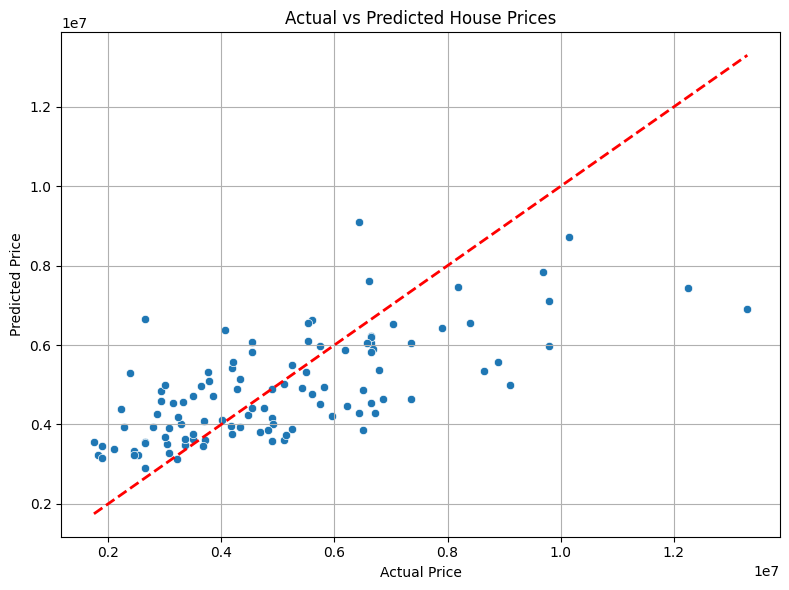

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


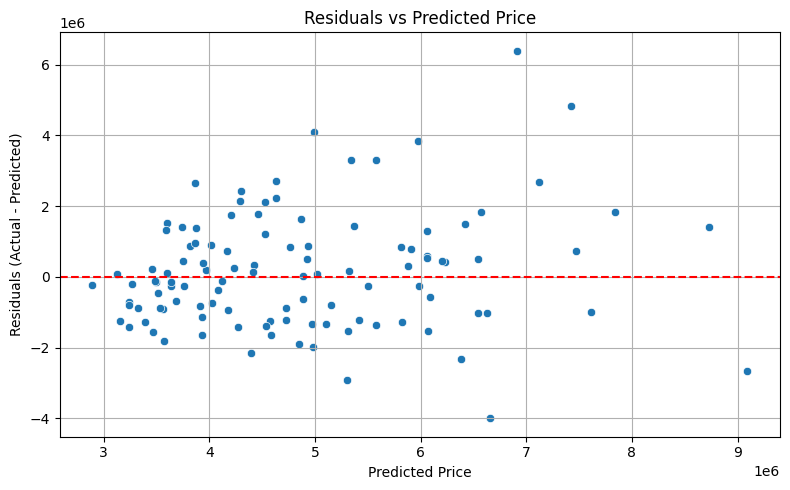

In [11]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


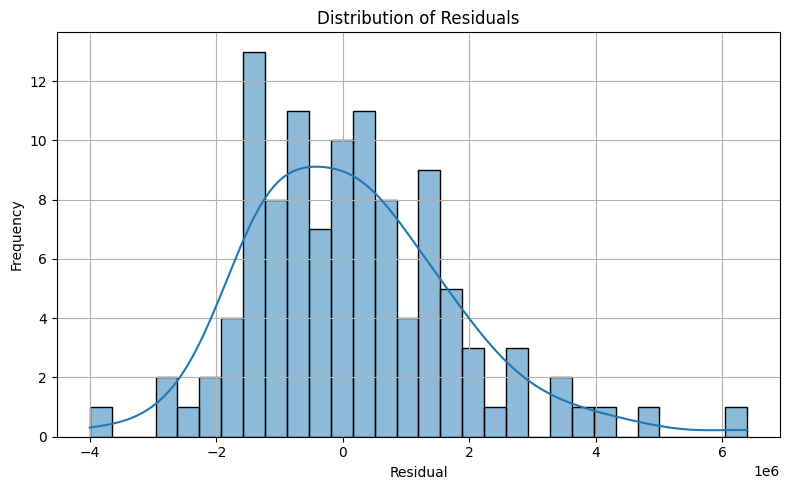

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()